C:\Users\karra\Anaconda3\lib\site-packages\numba\cuda\decorators.py:113: UserWarning: autojit is deprecated and will be removed in a future release. Use jit instead.
  warn('autojit is deprecated and will be removed in a future release. Use jit instead.')


with GPU: 9.655389199999945


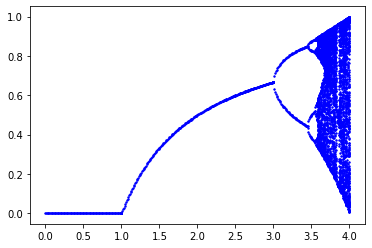

In [51]:
from numba import jit, cuda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# to measure exec time 
from timeit import default_timer as timer

def drawgraph(xs, ys):
    #plt.plot(xs, ys, linestyle='-', linewidth = 1)
    plt.scatter(xs, ys, 2, "#0000FF", linestyle='-')
    
# function optimized to run on gpu  
@jit(target ="cuda")
def func(xs, ts, n, A):
    # const
    x = 0.1
    dt = 0.0001
    
    def F(x):
        return A * x * (1 - x)
    
    for t in range(n):
        xs[t] = x
        #-----------------------------------------------------
        k1_x = F(x)
        k2_x = F(x + dt / 2 * k1_x)
        k3_x = F(x + dt / 2 * k2_x)
        k4_x = F(x + dt * k3_x)
        #-----------------------------------------------------
        #x += dt / 6 * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
        x = F(x)
        #-----------------------------------------------------
        ts[t] = t

if __name__=="__main__":

    n = 100000
    start = timer()
    
    As = []
    Xs = []
    A = 0.0
    for Ai in range(1000):
        xs = np.ones(n, dtype = np.float64)
        ts = np.ones(n,  dtype = np.float64)
        A = Ai/100

        func(xs, ts, n, A)
        
        used = []
        for i in range(1, 100):
            xs_ = xs[n - i]
            if not (xs_ in used):
                used.append(xs_)
                As.append(A)
                Xs.append(xs_)

    drawgraph(As, Xs)
    
    print("with GPU:", timer()-start)
    #plt.show()

In [ ]:
    As = []
    Xs = []
    A = 0.0
    for Ai in range(0, 1000):
        xs = np.ones(n, dtype = np.float64)
        ts = np.ones(n,  dtype = np.float64)
        A = Ai/100
        func(xs, ts, n)
        As.append(A)
        Xs.append(xs[n - 1])
        drawgraph(xs, ts)